# Linear regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Simple-linear-regression" data-toc-modified-id="Simple-linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple linear regression</a></span></li><li><span><a href="#How-good-is-our-model?" data-toc-modified-id="How-good-is-our-model?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How good is our model?</a></span></li><li><span><a href="#Calculate-the-R2-of-the-model" data-toc-modified-id="Calculate-the-R2-of-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate the R2 of the model</a></span></li><li><span><a href="#Linear-regression-with-sklearn" data-toc-modified-id="Linear-regression-with-sklearn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Linear regression with sklearn</a></span></li><li><span><a href="#Linear-regression-with-statsmodels" data-toc-modified-id="Linear-regression-with-statsmodels-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Linear regression with statsmodels</a></span></li><li><span><a href="#OLS-Concepts" data-toc-modified-id="OLS-Concepts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>OLS Concepts</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Linear-model-extensions" data-toc-modified-id="Linear-model-extensions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Linear model extensions</a></span><ul class="toc-item"><li><span><a href="#Challenging-the-additive-assumption:-synergy" data-toc-modified-id="Challenging-the-additive-assumption:-synergy-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Challenging the additive assumption: synergy</a></span></li></ul></li><li><span><a href="#Let's-do-it" data-toc-modified-id="Let's-do-it-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Let's do it</a></span><ul class="toc-item"><li><span><a href="#$R^2$-Adjusted" data-toc-modified-id="$R^2$-Adjusted-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>$R^2$ Adjusted</a></span></li></ul></li><li><span><a href="#Potential-problems-in-linear-regression" data-toc-modified-id="Potential-problems-in-linear-regression-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Potential problems in linear regression</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-Materials" data-toc-modified-id="Further-Materials-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Further Materials</a></span></li></ul></div>

In [1]:
#!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [3]:
"""
LINEAR REGRESSION

- graphic that Emma likes with the lines and the points
- equation that Ana showed
- shows correlation (?)
- how two variables correlated / associated
- first grade equation:
    - one variable to the power of 1
- equation that tries to explain something
- type of line that best fits
- it shows tendency
- r2: r squared
- p_value
- equation itself

- what variables? two numerical variables
- scatterplot on which we plot a line (the plot Emma likes)
"""

'\nLINEAR REGRESSION\n\n- graphic that Emma likes with the lines and the points\n- equation that Ana showed\n- shows correlation (?)\n- how two variables correlated / associated\n- first grade equation:\n    - one variable to the power of 1\n- equation that tries to explain something\n- type of line that best fits\n- it shows tendency\n- r2: r squared\n- p_value\n- equation itself\n\n- what variables? two numerical variables\n- scatterplot on which we plot a line (the plot Emma likes)\n'

## Motivation

We have 100 students, and we know:
 * How many hours they studied for their exam
 * The grade they have obtained (from 0 to 100)

### Exploratory Analysis

In [4]:
df = pd.read_csv("../datasets/hours_vs_mark.csv")

In [5]:
df

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
...,...,...
95,252,66
96,49,21
97,792,97
98,310,46


In [6]:
df.hours.min() 

2

In [7]:
df.hours.max() # assumption: within a year

986

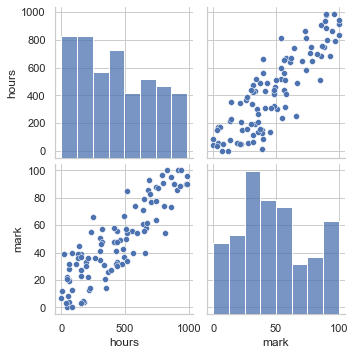

In [8]:
sns.pairplot(df); # relationship between variables & the variable itself (histplot)
# two histplot in the diagonal + two scatterplots

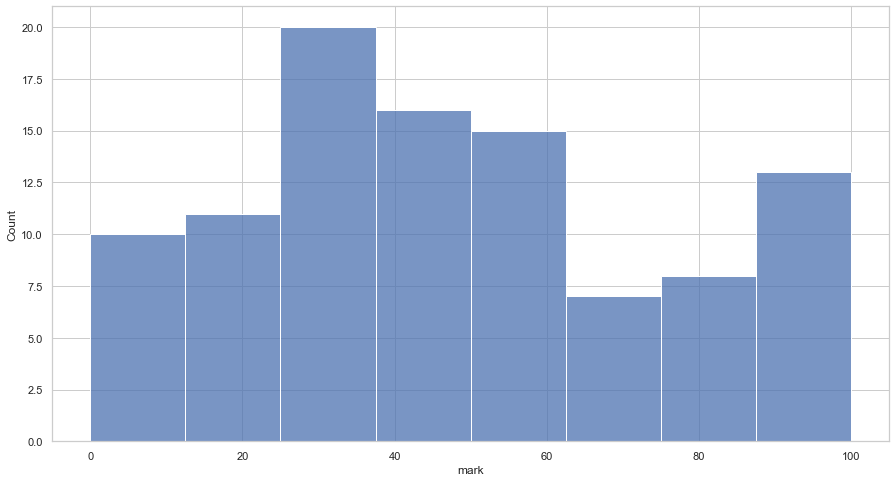

In [9]:
sns.histplot(df.mark);

In [10]:
mean = df.hours.mean()
mean

428.54

In [11]:
df.hours.std()

285.2417517995866

In [12]:
median = df.hours.median()
median

424.5

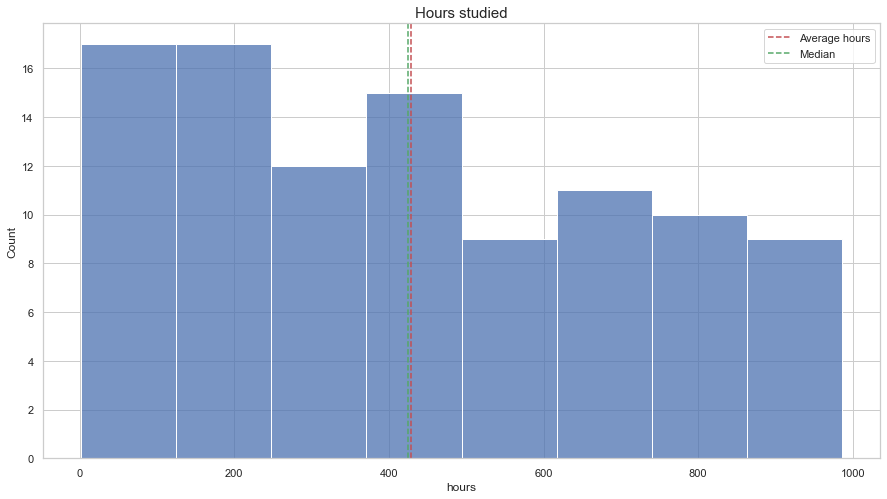

In [13]:
sns.histplot(df.hours)
plt.axvline(mean, c="r", label="Average hours", linestyle="--")
plt.axvline(median, c="g", label="Median", linestyle="--")
plt.legend()
plt.title("Hours studied", size = 15);


# Mean: 428.54 hours on average
# Median: 424.5 hours
# St dev: 285.24 hours
# Skewed: (+) positive
    # the tail is going to the right, which means:
        # Less people study hours
        # More people study less hours
        # it is more frequent to study a few hours than many

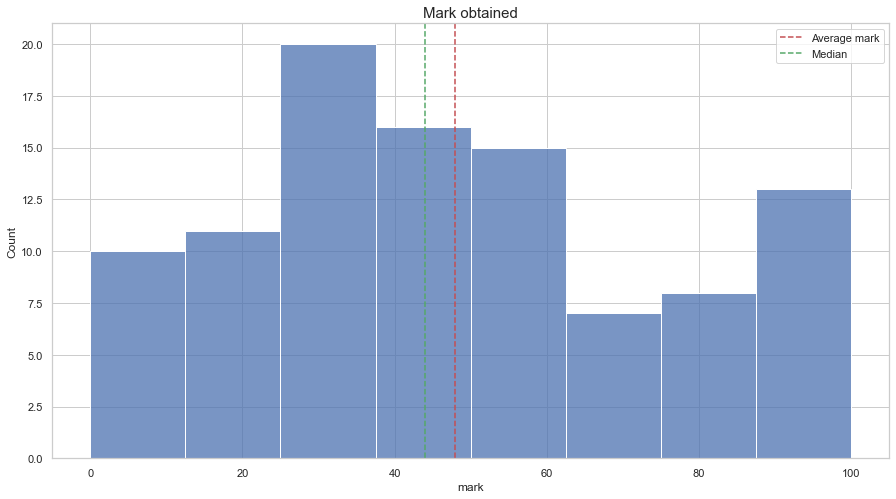

In [14]:
def histplot_details_mark ():
    sns.histplot(df.mark)
    plt.axvline(df.mark.mean(), c="r", label="Average mark", linestyle="--")
    plt.axvline(df.mark.median(), c="g", label="Median", linestyle="--")
    plt.legend()
    plt.title("Mark obtained", size = 15)
histplot_details_mark ()

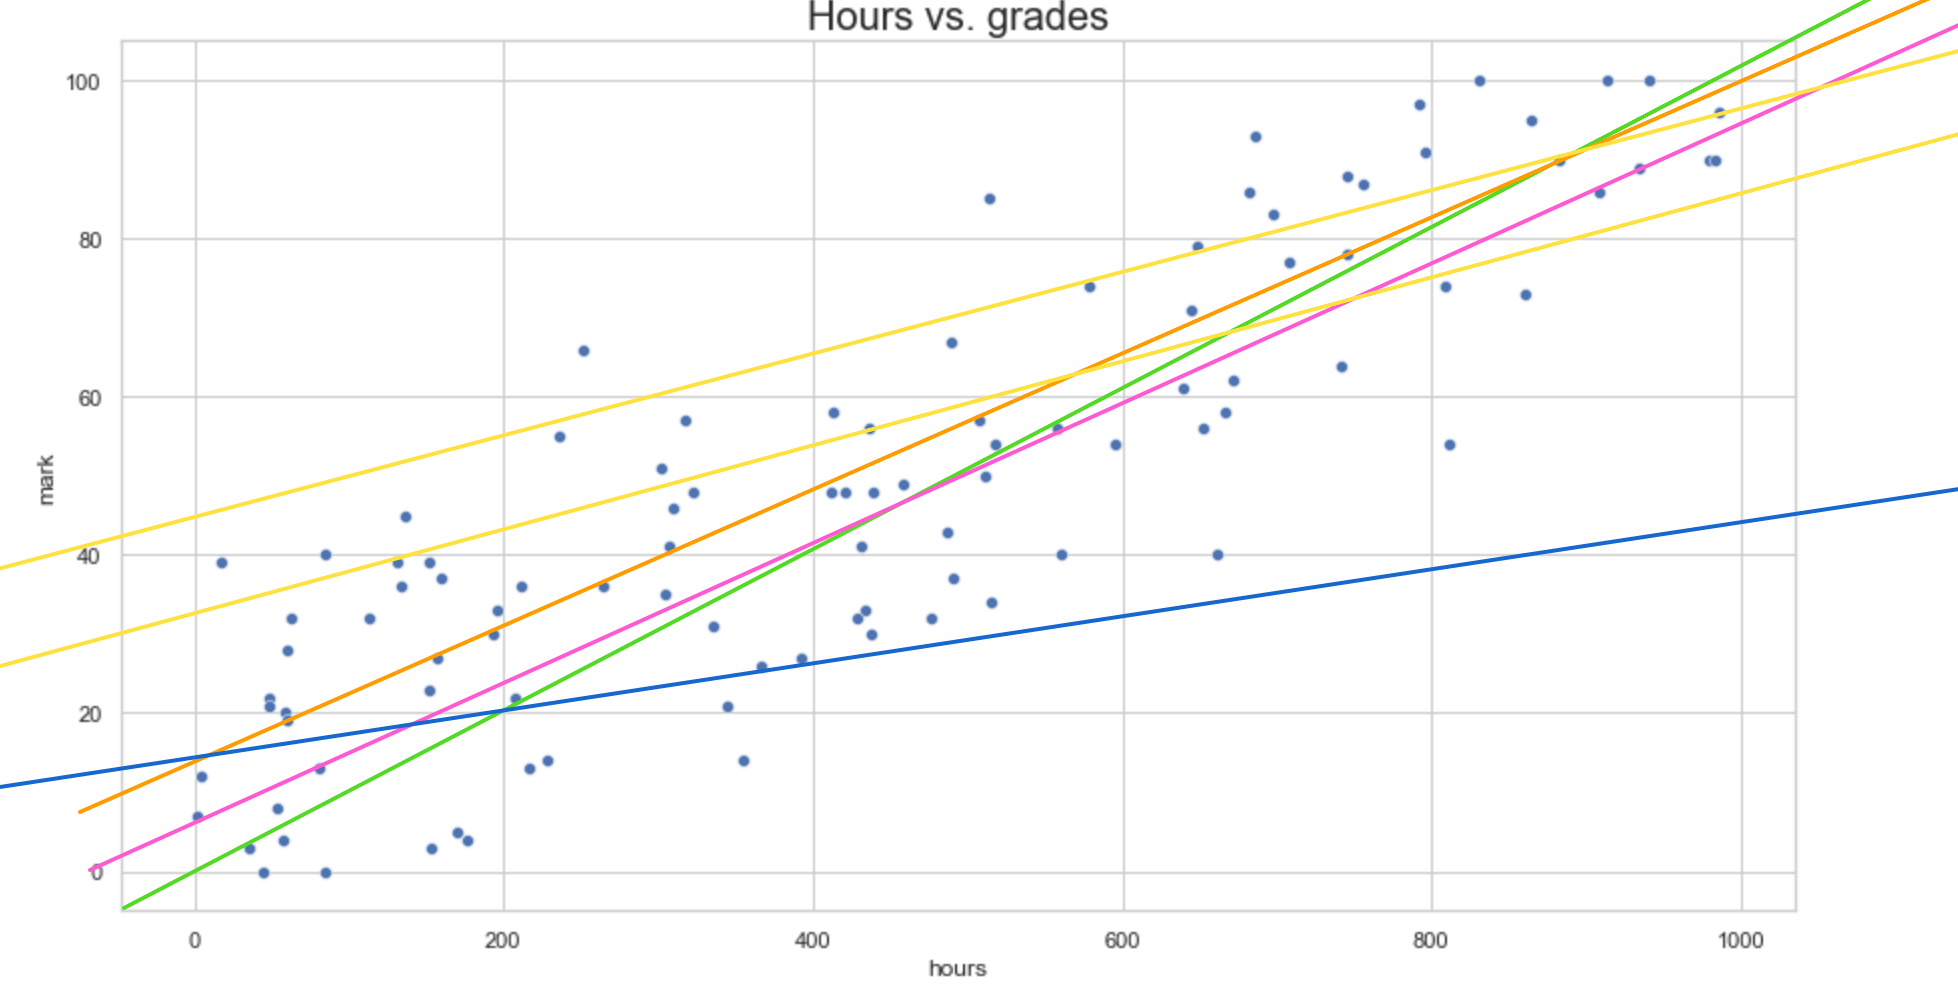

In [15]:
# Slope will be built by: 
    # X value * something_else
# Intercept

In [16]:
# slope: flat not flat, how inclined it is
# yellow lines: same slope, what changes between the spagettis is the interception
    # interception: n, when the line crosses the Y axis
    # the value of Y when X is zero

In [17]:
# 1-100, probably 70? 65?

In [18]:
q3 = df.mark.quantile(0.75)
q3

68.0

"\nMost of the people don't pass the test, assuming it is 50, also if it's 70, most people don't pass either.\nOnly a 1/4 of the class passes:\n    - Q3 (68). assuming 70 is the passing grade, 25ish% of the class passes, and 75%ish of the class fails\nSome excellent, some not so excellent (there's 100s and 0s)\n"

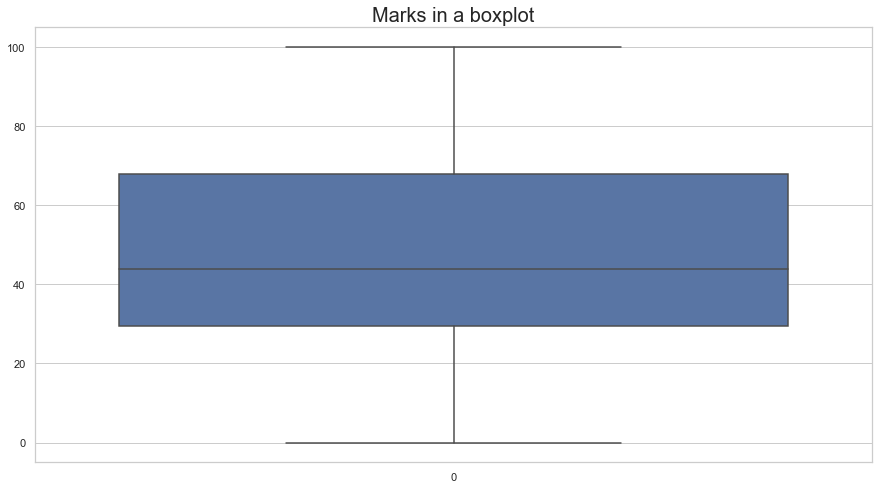

In [19]:
sns.boxplot(df.mark)
plt.title("Marks in a boxplot", size= 20)
"""
Most of the people don't pass the test, assuming it is 50, also if it's 70, most people don't pass either.
Only a 1/4 of the class passes:
    - Q3 (68). assuming 70 is the passing grade, 25ish% of the class passes, and 75%ish of the class fails
Some excellent, some not so excellent (there's 100s and 0s)
"""

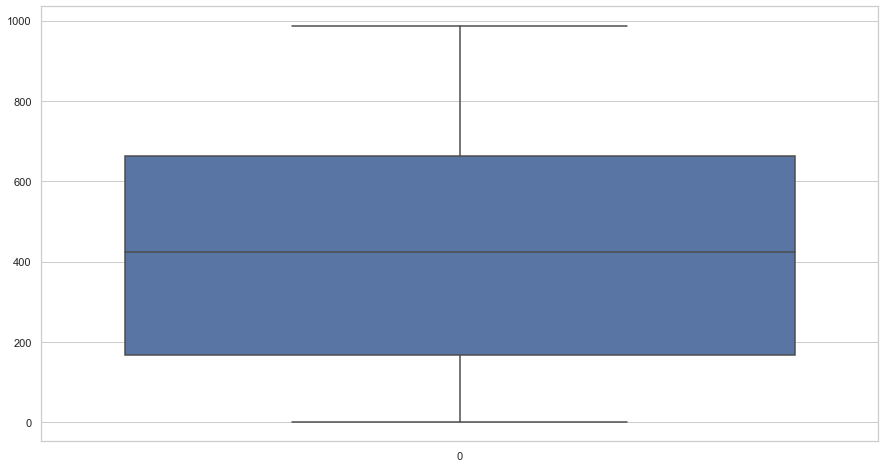

In [20]:
sns.boxplot(df.hours);

In [21]:
df.corr()

,hours,mark
hours,1.000000,0.867072
mark,0.867072,1.000000


In [22]:
# correlation of 0.86
# scatterplot: positive (goes up) tendency
# there was a bit of a stright line in the diagonal

We would like to understand the relationship $$grade = f(hours)$$

To be able to **predict the expected grade** that we will obtain when studying a certain number of hours

In [23]:
# correlation: to what extent it is related, -1, -1
# regression: how is it related, equation


def grades_and_marks (hours): # 1. We have control over how many hours we study (knowledge)
    return (45 * hours) + 5.987   # 2. Result: we know how much we get in the exam

grades_and_marks (5)

230.987

In [24]:
# model
# stereotype
def meeting_someone (nationality):
    return """portugese people are tacaños""" #-- ricardo said it
    
# summarizing & predicting, based on a variable we know / we have control over

In [25]:
# Categorial: probabilioty of one category or the other
# Machine learning

    # 1. regression: numerical, finding the equation / line that best fits your data points
    # 2. classification: categorical -> highest probability for categories
        # dogs / cats
        # 0.8 / 0.2

In [26]:
#  𝑌=𝑚∗𝑋+𝑛, equation for a line
    # 

Let's try a $$Y = m * X + n$$ linear regression
$m$ is the slope
$n$ is the value of $Y$ when $X=0$
And we have to:
$$grade = m * hours + n$$
We want to find $m$ and $n$ that *best* model our data


In [27]:
# Slope will be built by: 
    # X value * something_else
# Intercept


# grade = m * hours + n 

Which has worked better? How can we measure the error of the models?

We can subtract our prediction from the grade to see what we have done wrong in each one and make the average.... we use the absolute value to remove the negative values ​​and then we talk about this error, which has a name and it is MAE (mean absolutely error)

In [28]:
df.sample()

,hours,mark
14,908,86


In [29]:
df["prediction_1"] = 0.1 * df.hours + 5    # one equation, 5 is where it crosses
df["prediction_2"] = 0.12 * df.hours + 10    # a second equation, 10 is where it crosses

In [30]:
df.sample(5)

,hours,mark,prediction_1,prediction_2
83,84,0,13.4,20.08
65,439,48,48.9,62.68
89,2,7,5.2,10.24
48,708,77,75.8,94.96
63,322,48,37.2,48.64


In [31]:
# Which one of our predictions is better?

# see the error: difference between prediciton and marks
# Average Error when predicting: average (mark - prediction)

In [32]:
df["error_1"] = (df.mark - df.prediction_1).abs()
df["error_2"] = (df.mark - df.prediction_2).abs()

In [33]:
df.sample()

,hours,mark,prediction_1,prediction_2,error_1,error_2
72,438,30,48.8,62.56,18.8,32.56


In [34]:
# 1. Mean Absolute Error (MAE): in the same scale of the datapoints
# 2. Mean Squared Error (MSE): less sensitive to outliers
# 3. Root Mean Squared Eror (RMSE): less sensitive to outliers, but back to the original metrics

# We look at all the metrics at once

In [35]:
# What is the average error? to check what model / prediction works best
mae_prediction_1 = df["error_1"].mean()
mae_prediction_2 = df["error_2"].mean()

In [36]:
mae_prediction_1

12.008

In [37]:
mae_prediction_2

18.073599999999995

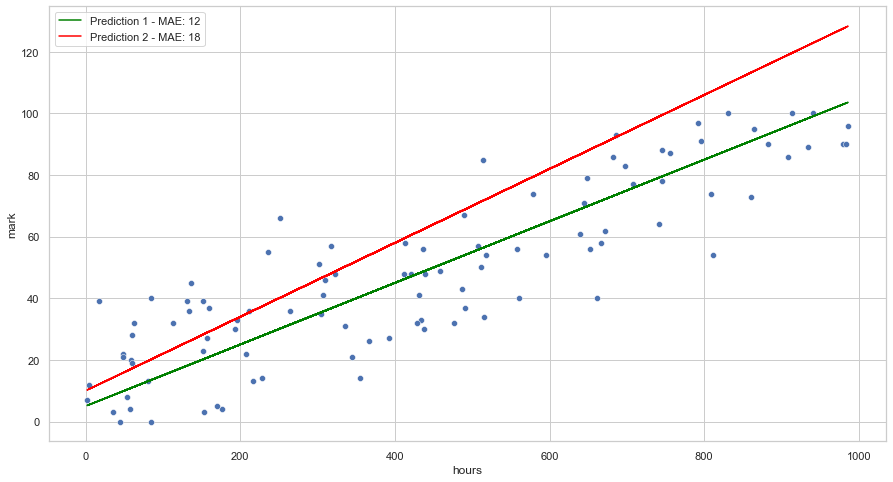

In [38]:
# Prediction 1 seems to be working a little bit better (on average)
sns.scatterplot(x=df.hours, y=df.mark)
plt.plot(df.hours, df.prediction_1, c="green", label="Prediction 1 - MAE: 12")
plt.plot(df.hours, df.prediction_2, c="red", label="Prediction 2 - MAE: 18")
plt.legend();

# 12 marks off vs 18 marks off

In [39]:
# Ana, question: what about another lines just in case?

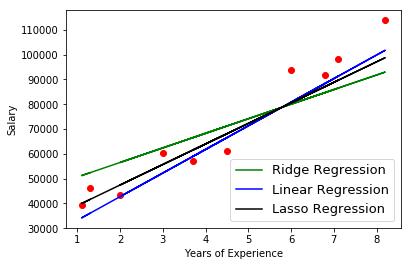

In [40]:
# OVERFITTING
    # some lr models that add some bias
        # to prevent overfitting your own data 

In [41]:
# A linear regression is an equation (for a line)
# Plots the line
# so that it minimizes the distance of all the points to the line
# average distance is lower in the green than in the red
# green model is better
# error is lower

What is going to be our goal? Python and its libraries do this for us, it calculates the slope and the intercept to be able to make "predictions" of unknown data from data that we already have.

## Simple linear regression

Simple linear regression a statistical model that assumes a linear relationship between a predictor and a target variable. Mathematically, it can be expressed as:

![formula](../images/formula.png)

If we dig a little deeper, we can find this other expression:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
* $X$ = predictor variable
* $Y$ = target variable
* $\beta_0$ = intercept
* $\beta_1$ = slope / slope
* $\epsilon$ = noise (gaussian)


The above equation is known as the *population regression line*.
The simple linear regression line usually has the form shown in the formula above, where β0 and β1 are unknown constants, representing the intercept and slope of the regression line, respectively.

The intercept is the value of the dependent variable (Y) when the independent variable (X) has a value of zero (0). The slope is a measure of the rate at which the dependent variable (Y) changes when the independent variable (X) changes by one (1). The unknown constants are called the coefficients or parameters of the model. This form of the regression line is sometimes known as a population regression line and, as a probabilistic model, it roughly fits the data set hence the use of the symbol (≈) in the image. The model is called probabilistic because it does not model all the variability of the dependent variable (Y)

In [42]:
lr = LinearRegression() # 1. Create an equation that draws a line
lr 

LinearRegression()

In [43]:
# 2. FIT the model to my data: draw the line so it accomodates MY datapoints

X = df[["hours"]]
y = df.mark

lr.fit(X, y) 

# Signature: lr.fit(X, y, sample_weight=None) # X is a df and the y is a series
    # X -> [[]], hours
    # y -> [], grades / mark
    
    # Hours: what we use to predict, independant, X
    # Grades: to be predicted, dependant, y
    
    # result (y) = intersection +  slope *  X (independant, what we know) 

    
"""
def grades_and_marks (hours): 
    return (45 * hours) + 5.987  
"""  

'\ndef grades_and_marks (hours): \n    return (45 * hours) + 5.987  \n'

In [44]:
# 1. Created the model
# 2. Fitted the model. Trained. Fit == Train

In [45]:
lr

LinearRegression()

In [46]:
#[i for i in dir(lr)] 

# coef_
# intercept_

In [47]:
lr.coef_

array([0.08437787])

In [48]:
lr.intercept_

11.78070717807148

In [49]:
#grades = lr.coef_[0] * x +  lr.intercept_

In [50]:
def grades_and_hours (hours):
    return lr.coef_[0] * hours +  lr.intercept_

In [51]:
grades_and_hours (204)

28.99379285425904

In [52]:
df["prediction_through_scikit_learn"] = df.hours * lr.coef_[0] + lr.intercept_

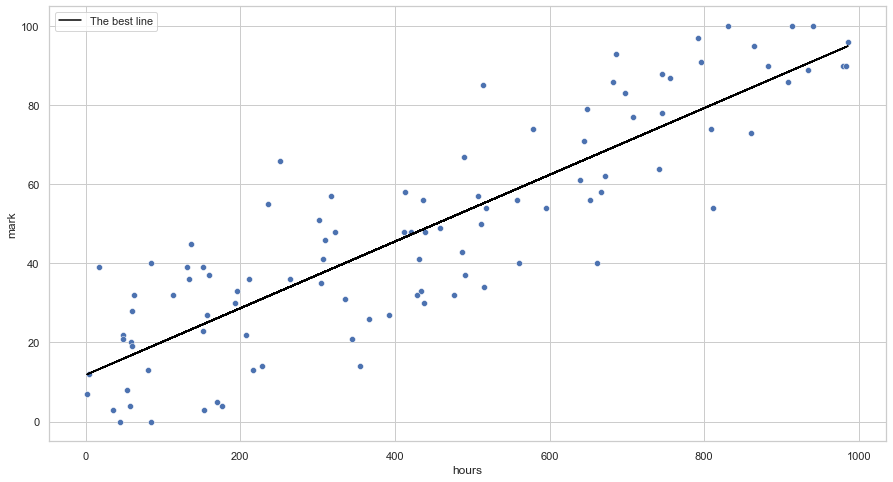

In [98]:
sns.scatterplot(x=df.hours, y=df.mark)
plt.plot(df.hours, df.prediction_1, c="green", label="Prediction 1 - MAE: 12")
plt.plot(df.hours, df.prediction_2, c="red", label="Prediction 2 - MAE: 18")
plt.plot(df.hours, df["prediction_through_scikit_learn"], c="black", label="prediction_through_scikit_learn")
plt.legend();

In [54]:
# mean absolute error
df["error_scikit_learn"] = (df.mark - df["prediction_through_scikit_learn"]).abs()

In [55]:
df["error_scikit_learn"].mean()

11.402698299019335

In [56]:
# 1. Create the model
# 2. Fit / train the model with our data
# 3. LR: coef_ (can be more) & intercept
# 4. We have the equation
# 5. predict (manually)

In [57]:
lr.predict([[200]])

/Users/fernandocosta/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.65628137])

In [58]:
# 0. Instantiate the model
# 1. Fit (to your data) -> have the equation

# 2. Predict -> run the equation on new data
# 3. Error

In [59]:
# If model A better than model B better model C
# deciding a model based on the error
# by comparison

## How good is our model?

In [60]:
# How good the model is on its own
# 12 grades on average

# How good is one model? 
# What percentage of variance is the model explaining?
# 100%: perfect model
# 0%: bad model

# 0-1, how good it is
# Error: 0-infinity

# r2: r squared (0, 1)
    # to what extent, the model is explaining
    # the variance in the data
    # how well the line is gathering all the points
    
# Over-fitting
    # model is over adjusted
    # literally studying the questions of the test
    # on the test -> a new question
    
    # low error / high r2 -> data (study)
    # high error ->  exam

    # threshold? r
        # split data: train / test split (orange/blue boxes) -> prevents overfitting
        # hide a portion of the data what we have the answer for
            # so that, we can test on results we know
            

The numerical difference between the *least squares regression line* and the actual value is called the *residual* , and it represents the error in the estimate: $e = y_i - \hat{y}$.
The regression line minimized the **Residual Sum of Squares** (RSS)

The residual sum of squares measures the amount of error remaining between the regression function and the data set. a smaller residual sum of squares represents a regression function. The residual sum of squares, also known as the sum of squared residuals, essentially determines how well a regression model explains or represents the data in the model.

$$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$

In [61]:
RSS = ((df.prediction_through_scikit_learn - df.mark) ** 2).sum()
RSS

18931.609105092302

If we only used the mean as the predicted value for each prediction, the error we would make is (**total sum of squares**)

$$TSS=\Sigma(y_i - \bar{y}_i)^2$$
Let's consider this our starting point, make a prediction and plot it

In [62]:
TSS = ((df.mark - df.mark.mean()) ** 2).sum()
# addition of the differenes of the values from THE MEAN & squared

Recall that linear regression coefficients minimize the $RSS=Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that remains unexplained after running the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1-\frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained by X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is nothing more than the square of the *Pearson* correlation coefficient that we already know.

In [63]:
# tss
# rss

In [64]:
df.sample()

,hours,mark,prediction_1,prediction_2,error_1,error_2,prediction_through_scikit_learn,error_scikit_learn
97,792,97,84.2,105.04,12.8,8.04,78.607981,18.392019


In [65]:
X = df[["hours"]] 
y = df.mark

# squaring, sqrt -> mitigate / more visible the effect of outliers
# the scales of things
# always positive: absolute, square, sqr(squared)

In [66]:
df["avg"] = df["mark"].mean()

In [67]:
df.sample()

,hours,mark,prediction_1,prediction_2,error_1,error_2,prediction_through_scikit_learn,error_scikit_learn,avg
18,152,39,20.2,28.24,18.8,10.76,24.606144,14.393856,47.94


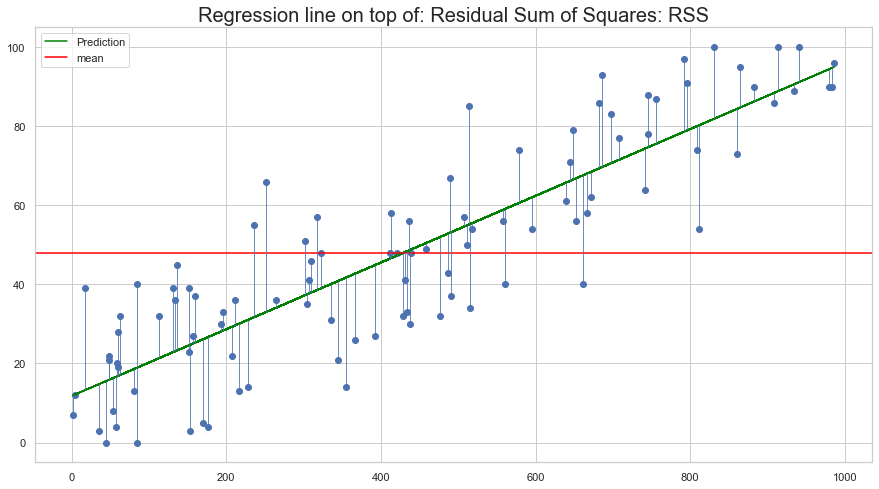

In [68]:
plt.scatter(X, y)
plt.plot(df.hours, df["prediction_through_scikit_learn"], c="green", label="Prediction")
plt.axhline(df["mark"].mean(), c="red", label="mean")
plt.vlines(X,  df["prediction_through_scikit_learn"], y, lw=0.8)
plt.title("Regression line on top of: Residual Sum of Squares: RSS", size=20)
plt.legend();

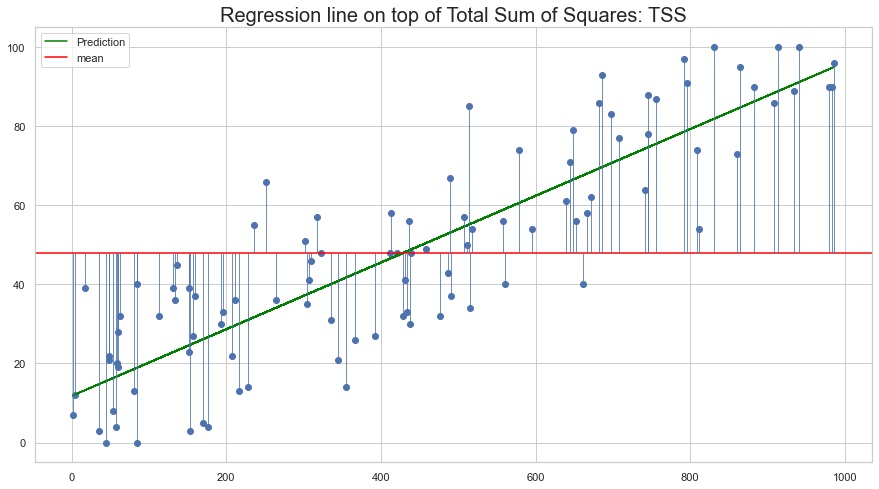

In [69]:
plt.scatter(X, y)
plt.plot(df.hours, df["prediction_through_scikit_learn"], c="green", label="Prediction")
plt.axhline(df["mark"].mean(), c="red", label="mean")
plt.vlines(X, df["avg"], y, lw=0.8)
plt.title("Regression line on top of Total Sum of Squares: TSS", size=20)
plt.legend();


In [70]:
# variance (of the data) & distance (model to the datapoints)
r_2 = 1 - RSS/TSS

In [71]:
r_2 # 0.66     # 0-1

0.7518130774464549

In [72]:
# r_2 = to explain to what extent / what percentage of variance is being explaing BY THE MODEL
    # TSS: variance of the data: distance of the datapoints to ITS OWN MEAN
    # RSS: variance / error: distance of the datapoints to THE MODEL
    
# R_2 1 - RSS/TSS

In [73]:
# 12 on average wrong: MAE of one model
# 11 on average wrong: MAE of another model

# metrics could be different

In [74]:
# These ones to be close to zero:
    # MAE
    # MSE
    # RMSE
    
# These one to be close to one:
    # R2, coefficient of determination

In [75]:
# regression vs correlation
    # correlation: how much: correlation, r
        # how much one changes when the other one also changes
        
    # regression: how -> what is the equation
        # how: equation
        # how good the equation is: r2 (percentage of variance explained by the model)

## Calculate the R2 of the model

$R^2$ measures how good our regression model is. The bigger the better. It is a value between 0 and 1

**NOTE**: it is computable for any model, it does not matter if it is linear or not. Only the actual and predicted values ​​are needed.

## Linear regression with sklearn

# 1. Select the data: `my_variables = X, y` # independant X, dependant y. target variable -> y (grades)
# 2. Fit the model to the data: `my_model = lr.fit(X, y)`
# 3. Predict with the model fitted: `predicted_y = lr.predict(X)`

In [76]:
from sklearn import metrics

**Calculation of the absolute mean error, the mean square error and the mean square error

- **MAE** is the easiest to understand, because it is the mean error.
- **The MSE** is more popular than the MAE, because the MSE accounts for larger errors, which is often useful in the real world.
- **RMSE** is even more popular than MSE, it is the square root of the MSE and measures the standard deviation of the residuals.

These are all **loss functions**: we want to minimize them.

In [77]:
mae = metrics.mean_absolute_error(df.mark, df.prediction_through_scikit_learn)
mse = metrics.mean_squared_error(df.mark, df.prediction_through_scikit_learn)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(df.mark, df.prediction_through_scikit_learn)

In [78]:
# metrics.mean_absolute_error(y, y_pred)

In [79]:
print(f"MAE is: {mae}")
print(f"MSE is: {mse}")
print(f"RMSE is: {rmse}") 
print(f"----------") 
print(f"r2 is: {r2}") 

MAE is: 11.402698299019335
MSE is: 189.31609105092303
RMSE is: 13.759218402617318
----------
r2 is: 0.7518130774464549


Read more about MAE, MSE, RMSE AND R2 [here](http://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e)

In [80]:
# scikitlearn # the info we need, but not as detailed
# smf.ols() # more of info

## Linear regression with statsmodels

A bit of [documentation](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

And [this article](https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01) that summarizes how to interpret OLS summary information

In [81]:
result = smf.ols("mark ~ hours", data = df).fit()
# Ordinary Least Squares, least distance to the points

In [82]:
lr.coef_[0]

0.08437787096170372

In [83]:
lr.intercept_

11.78070717807148

In [100]:
y = 11.78 + x * 0.084

y = 11.78 + x * 0.084


In [84]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mark   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     296.9
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.04e-31
Time:                        05:45:07   Log-Likelihood:                -404.06
No. Observations:                 100   AIC:                             812.1
Df Residuals:                      98   BIC:                             817.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7807      2.517      4.680      0.000       6.785      16.776
hours          0.0844      0.005     17.230      0.000       0.075       0.094
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.926
Skew:                           0.010   Prob(JB):                        0.382
Kurtosis:                       2.320   Cond. No.                         931.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Concepts

- <b>R2</b> : The coefficient of determination measures how much of the variation of 𝑦 is explained by the model.
If the variance of the errors or residuals 𝜎2𝑒 is zero, the model explains 100% of the variable 𝑦. If 𝜎2𝑒 is equal to the variance of 𝑦 the model explains nothing and 𝑅2 is equal to zero.


- <b>𝑅¯2 </b> : The adjusted correlation coefficient 𝑅¯2 corrects the value of 𝑅2 by the number of variables 𝑘 (equal to 2 for the analyzed case) and the amount of data 𝑁

- <b>P value </b> The p-value for each term tests the null hypothesis that the coefficient is equal to zero (has no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically p-values ​​are used to determine which terms should be kept in the regression model.


Description of the p value:
The p-value is a probability value, so it ranges between 0 and 1. The p-value shows us the probability of having obtained the result that we have obtained assuming that the null hypothesis H0 is true. It is often said that high values ​​of p do not allow H0 to be rejected, while low p values ​​do allow H0 to be rejected.

In a statistical test, the null hypothesis H0 is rejected if the p-value associated with the observed result is equal to or less than an arbitrarily set $\alpha$ significance level, conventionally 0.05 or 0.01. In other words, if the result obtained is more unusual than the expected range of results given a true null hypothesis H0 and the chosen significance level $\alpha$, that is, if p is less than $\alpha$, we can say that we have a statistically significant result that allows reject H0.

It is important to emphasize that a hypothesis test does not allow accepting a hypothesis; he simply rejects it or does not reject it, that is to say, he dismisses it as plausible (which does not necessarily mean that it is true, simply that it is more likely to be) or implausible.

## Multiple Linear Regression

Of course, the hours one studies are not the only important factor in getting good grades in the real world. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m + \epsilon$$
 
 In this case, what we are going to do is add a variable that subtracts from the note, the party hours.
 Imagine that for every hour that we go out partying, neurons in our brain die and we forget information, therefore, we will lose a grade (remember that we are inventing data)

In [85]:
# dependant variable (y): one series
# independant variables (X), X = df[[]], more than one variable, 

The multiple linear regression coefficients are computed in a similar way to the simple linear regression case: they minimize

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{beta_0} + \hat{beta_1 X_1} + \hat{beta_2} X_2 + \hat + \hat{\beta_2} X_m$$

In [86]:
# y = intercept (beta0) + beta1 * var_1 (study) + beta_2 * var_2 (party)

The coefficient is the number by which we multiply the predictor variable (X) in this case we have two, study hours and party hours.
The positive coefficient indicates that the correlation is positive (the more hours I study, the better the grade I get) and the coefficient of party hours is negative, therefore it indicates that if that predictive variable is greater, my target variable decreases.

In [87]:
# Goal: how are grades related to study_hours and party_hours?

beta_0 = 10 # intercept
beta_1 = 0.08 # coefficient_1: study hours
beta_2 = -0.03 # coefficient_2: party hours
num_grades = 100

# y = b0 + b1*hours_study + b2*hours_partying

In [88]:
# Fake the data

study_hours = np.random.normal(500, 200, num_grades)
party_hours = np.random.normal(500, 200, num_grades)

In [89]:
y = beta_0 + study_hours * beta_1 + party_hours * beta_2 + np.random.normal(0, 5, 100)

In [90]:
data = pd.DataFrame({"grades": y, "study_hours": study_hours, "party_hours": party_hours})
data

,grades,study_hours,party_hours
0,11.649473,333.291048,549.716973
1,-7.193149,0.552349,418.482638
2,56.635950,680.674360,351.160993
3,45.458872,475.503679,345.816222
4,15.113410,465.851075,947.321026
...,...,...,...
95,47.612876,593.435740,385.663573
96,42.278929,493.516664,116.375937
97,38.564199,508.073809,519.949129
98,44.563416,506.243079,270.131893


In [91]:
data.sample()

,grades,study_hours,party_hours
45,-6.342831,79.83803,543.313228


In [92]:
# 1. X, y: 
X = data[["study_hours", "party_hours"]]
y = data.grades

# 2. Choose a model: lr
lr = LinearRegression() # Instantiating the model -> draw a straight line

# 3. Fit
lr.fit(X, y) # Draw the straight line based on this data

# 4. Metrics
lr.intercept_ # 9.945632841045317
lr.coef_ # [ 0.08185069, -0.03095235]

array([ 0.08021487, -0.0272384 ])

In [93]:
# 1. X, y: 
X = data[["study_hours", "party_hours"]]
y = data.grades

# 2. Choose a model: lr & fit
results = smf.ols("grades ~ study_hours + party_hours", data = data).fit()

# 3. Metrics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     806.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           3.57e-61
Time:                        05:45:09   Log-Likelihood:                -287.44
No. Observations:                 100   AIC:                             580.9
Df Residuals:                      97   BIC:                             588.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2888      1.516      5.468      0.000       5.280      11.298
study_hours     0.0802      0.002     37.279      0.000       0.076       0.084
party_hours    -0.0272      0.002    -12.582      0.000      -0.032      -0.023
==============================================================================
Omnibus:                        4.662   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.961
Skew:                          -0.235   Prob(JB):                        0.227
Kurtosis:                       2.300   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
# lasso, ridge (variances of the lines), svr, ...
# trial / error process: we try different models: keep the one 
    # with the highest r and lowest error
    # try maaaany different things at once

# looping through different models 

## Categorical variables

Very often we are faced with situations where the predictors are *qualitative* in nature. A good example could be the music they listen to which can take the values ​​$rock$ or $indie$.

In [95]:
data["music"] = np.random.choice(["rock", "indie"], num_grades)

In [96]:
data

,grades,study_hours,party_hours,music
0,11.649473,333.291048,549.716973,indie
1,-7.193149,0.552349,418.482638,indie
2,56.635950,680.674360,351.160993,rock
3,45.458872,475.503679,345.816222,rock
4,15.113410,465.851075,947.321026,indie
...,...,...,...,...
95,47.612876,593.435740,385.663573,indie
96,42.278929,493.516664,116.375937,indie
97,38.564199,508.073809,519.949129,rock
98,44.563416,506.243079,270.131893,rock


In [97]:
data["music_numeric"] = data["music"].apply(lambda x: 1 if x == "indie" else 0)
data.sample()

# if "indie", truthy

,grades,study_hours,party_hours,music,music_numeric
62,21.60942,266.000144,439.966931,indie,1


In [349]:
data["rock_or_indie"] = data.music.str.get_dummies("rock")
data

,grades,study_hours,party_hours,music,music_numeric,rock_or_indie
0,28.326691,535.236835,448.625332,indie,1,1
1,76.649295,952.635721,457.839277,rock,0,0
2,48.372003,568.959786,351.551125,indie,1,1
3,34.570452,462.216317,364.561867,indie,1,1
4,49.062872,489.180555,69.178910,rock,0,0
...,...,...,...,...,...,...
95,34.635416,552.243781,782.044916,rock,0,0
96,37.121123,683.937860,623.140665,indie,1,1
97,16.012328,157.294083,430.709031,rock,0,0
98,43.481558,810.403377,829.669562,indie,1,1


In [350]:
#data.drop(columns=["music_numeric"], inplace=True)
#data.drop(columns=["music_rock"], inplace=True)
#data.drop(columns=["music"], inplace=True)

In [351]:
data.sample()

,grades,study_hours,party_hours,music,music_numeric,rock_or_indie
89,46.785961,675.281961,614.419512,rock,0,0


In [352]:
results = smf.ols("grades ~ study_hours + party_hours + rock_or_indie", data=data).fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     343.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.72e-51
Time:                        17:51:40   Log-Likelihood:                -291.89
No. Observations:                 100   AIC:                             591.8
Df Residuals:                      96   BIC:                             602.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.5575      1.786      8.150      0.000      11.012      18.103
study_hours       0.0771      0.003     29.388      0.000       0.072       0.082
party_hours      -0.0360      0.002    -15.015      0.000      -0.041      -0.031
rock_or_indie    -1.6773      0.935     -1.793      0.076      -3.534       0.179
==============================================================================
Omnibus:                        0.931   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.950
Skew:                           0.224   Prob(JB):                        0.622
Kurtosis:                       2.832   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We include this information in the model through a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      1  \quad \text{if listens to rock} \\
      0  \quad \text{if listens to indie} \\
\end{array} 
\right. 
$$


If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if listens to rock} \\
      \beta_0 + \epsilon_i  \quad \text{if listens to indie} \\
\end{array} 
\right.  $$

In this case, $\beta_0$ represents the average score of people who listen to rock, and $\beta_0 + \beta_1$ the average score of people who listen to indie.

In [353]:
df_adv.sample()

,TV,Radio,Newspaper,Sales,rand_1,rand_2,rand_3,rand_4,rand_5,rand_6,rand_7,rand_8
149,44.7,25.8,20.6,10.1,-1.235662,0.578482,-0.1276,-2.095267,-0.106107,0.243487,0.213653,-0.259295


In [354]:
df_adv = pd.read_csv("../datasets/Advertising.csv")
smf.ols("Sales ~ TV + Radio + Newspaper", data=df_adv).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        17:51:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
df_adv["rand_1"] = np.random.normal(size=200)
df_adv["rand_2"] = np.random.normal(size=200)
df_adv["rand_3"] = np.random.normal(size=200)
df_adv["rand_4"] = np.random.normal(size=200)
df_adv["rand_5"] = np.random.normal(size=200)
df_adv["rand_6"] = np.random.normal(size=200)
df_adv["rand_7"] = np.random.normal(size=200)
df_adv["rand_8"] = np.random.normal(size=200)

In [356]:
df_adv.sample()

,TV,Radio,Newspaper,Sales,rand_1,rand_2,rand_3,rand_4,rand_5,rand_6,rand_7,rand_8
150,280.7,13.9,37.0,16.1,-0.727958,1.64606,0.81987,-0.259895,-0.973419,0.997354,0.304316,-0.449342


In [357]:
smf.ols("Sales ~ TV + Radio + Newspaper + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + + rand_8", data=df_adv).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.88e-89
Time:                        17:51:41   Log-Likelihood:                -379.15
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     188   BIC:                             821.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9161      0.313      9.312      0.000       2.298       3.534
TV             0.0460      0.001     33.228      0.000       0.043       0.049
Radio          0.1885      0.009     21.852      0.000       0.171       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
rand_1        -0.2470      0.115     -2.143      0.033      -0.474      -0.020
rand_2         0.1430      0.123      1.160      0.248      -0.100       0.386
rand_3        -0.0211      0.116     -0.182      0.856      -0.250       0.208
rand_4         0.0115      0.126      0.092      0.927      -0.236       0.259
rand_5         0.1060      0.129      0.821      0.413      -0.149       0.361
rand_6        -0.1198      0.127     -0.942      0.347      -0.371       0.131
rand_7        -0.2700      0.120     -2.245      0.026      -0.507      -0.033
rand_8         0.1454      0.123      1.184      0.238      -0.097       0.388
==============================================================================
Omnibus:                       36.086   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.195
Skew:                          -1.002   Prob(JB):                     1.03e-12
Kurtosis:                       4.614   Cond. No.                         464.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear model extensions

There are several assumptions used when fitting a linear model.
Linear model assumptions 
[VIDEO](https://www.youtube.com/watch?v=hVe2F9krrWk)

* Errors are normally distributed and have constant variance: luxury items
* Errors are not correlated with each other

***Additive Assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values ​​of the other predictors.

***Linear Assumption**The change in the answer for a unit increase in $X_j$ is the same regardless of the value of $X_j$.

### Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we may think that the more our ads are heard on the radio, the more effective our TV ads will be. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

This is a commonly studied topic in [marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

## Let's do it
* Create three independent simple linear regression models
* Interpret the results
* Create a multivariate model with the three predictors
* Interpret the results

The difference is that the covariance gives us the direction (positive or negative) between the variables and the correlation gives us this plus the strength of it.

Remember the **hierarchical principle:**

"*If we include an interaction in a model, we must also include the main effects, even if the p-values ​​associated with its coefficients are not significant*"

### $R^2$ Adjusted
There is a curious thing with $R^2$. Look what happens when we include *random* variables!

"It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared."

In [358]:
df_adv["rand_1"] = np.random.normal(size=200)
df_adv["rand_2"] = np.random.normal(size=200)
df_adv["rand_3"] = np.random.normal(size=200)
df_adv["rand_4"] = np.random.normal(size=200)
df_adv["rand_5"] = np.random.normal(size=200)
df_adv["rand_6"] = np.random.normal(size=200)
df_adv["rand_7"] = np.random.normal(size=200)
df_adv["rand_8"] = np.random.normal(size=200)

## Potential problems in linear regression

The main assumptions of a linear model are:

* Data is linear
* Errors are not correlated
* The variance of the error terms is constant

What happens if these assumptions are not met?

In addition, our models can suffer from other problems such as:
* Outliers
* Collinearity
* Missing values

See this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.

In [ ]:
# drop some columns if correlation is high
    # how high?
    # https://en.wikipedia.org/wiki/Variance_inflation_factor

These four data sets are different, but they happen to have the same arithmetic mean and variance of the x and y values, the same correlation, the same correlation coefficient, and the same regression line. some with 2 or 3 decimal places. They are the Anscombe Quartet, named for F.J. Anscombe, a statistical mathematician who published them in 1973. They are often used to teach that in addition to calculating the statistical properties of data, it is convenient to visualize them.

In all cases, the representations tell us something more about the data: the first ones seem somewhat random but related, the second ones show a clear but remarkably different pattern; in the third and fourth there are other patterns clouded by some outliers. These values ​​can be errors, real data that is just out of the ordinary, or even artificially produced data to make it all fit together.

Moral: don't blindly trust the data and neither the statistics you get from them; also try to set up a visualization to understand them.
![anscombe](../images/anscombe.png)

## Summary

## Further Materials 

* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)